In [1]:
%matplotlib widget

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

from astropy.coordinates import SkyCoord
import astropy.units as u

In [4]:
from vasca.region import Region
import vasca.visualization as vvis
from vasca.utils import marker_set, color_palette

# Load Region

In [5]:
# Load region file
#region_name = "TDS"
region_name = "PS1-10jh"

region_fname = "../.././vasca_pipeline/"+region_name+"/region_"+region_name+".fits"

assert os.path.isfile(region_fname)

rg = Region()
rg.load_from_fits(region_fname)

In [6]:
display(rg.tt_fields)
rg.info() # Show available tables

field_id,name,ra,dec,observatory,obs_filter,sel,fov_diam,nr_vis,time_bin_size_sum,time_start,time_stop,rg_fd_id
,,deg,deg,,,,deg,,s,d,d,
bytes22,bytes22,float64,float64,bytes22,bytes22,bool,float32,int32,float32,float64,float64,int32
GNU2432438716514435072,MISDR1_10450_0621,241.73700743062295,53.939159842803,GALEX,NUV,True,1.1,2,2856.4502,53181.783171296294,54855.237977068864,0
GNU2529969795944677376,ELAISN1_09,241.60667709058498,53.531821052495,GALEX,NUV,True,1.1,16,20289.65,53492.725590277776,56272.426620370374,1
GNU2597664528044916736,PS_ELAISN1_MOS15,242.396514585217,53.9999872930018,GALEX,NUV,True,1.1,22,28044.65,54960.52040509259,56810.67461805556,2
GNU3880803393752530944,MISGCSN2_10493_0117,242.64270077057597,53.1235646075049,GALEX,NUV,True,1.1,1,399.2,55406.16984953704,55805.36986174407,3
GNU6374997199557754880,AIS_116_1_53,241.769008045614,53.9503314737949,GALEX,NUV,True,1.1,4,377.0,53137.67453703703,54024.640069444446,4



 tt_fields:
<Table length=5>
       name        dtype  unit                       description                      
----------------- ------- ---- -------------------------------------------------------
         field_id bytes22                                          Field source ID nr.
             name bytes22                                                   Field name
               ra float64  deg                          Center RA of the field (J2000)
              dec float64  deg                         Center Dec of the field (J2000)
      observatory bytes22                    Telescope of the observation (e.g. GALEX)
       obs_filter bytes22                         Filter of the observation (e.g. NUV)
              sel    bool                        Selection of rows for VASCA analysis.
         fov_diam float32  deg Field radius or box size (depending on the observatory)
           nr_vis   int32                          Total number of visits of the field
time_bin_size

# View individual sources

In [7]:
# Set of interesting objects
tde_info = {
    "PS1-10jh": {
        "ra": 242.368075,
        "dec": 53.673492,
        "trans_type": "TDE",
        "pub_date": "2012"
    },
    "PS1-11af": {
        "ra": 149.36175,
        "dec": 3.23361,
        "trans_type": "TDE",
        "pub_date": "2013"
    }
}

Matched source at distance 317284.19 arcsec


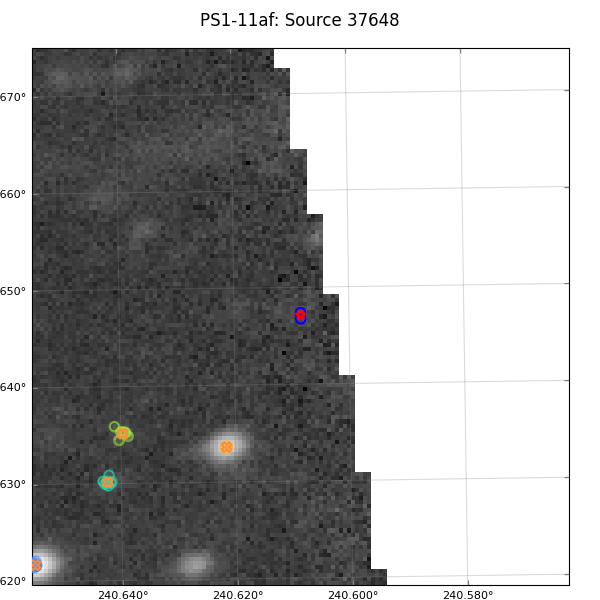

In [8]:
coord_cat = SkyCoord(tde_info["PS1-11af"]["ra"] * u.deg, tde_info["PS1-11af"]["dec"] * u.deg, frame="icrs")
vvis.plot_source_tumbnail(coord_cat, rg, cutout_size=(200, 200), fig_title="PS1-11af", marker_shows="field", color_shows="source")

Matched source at distance 0.24 arcsec
CPU times: user 422 ms, sys: 26.3 ms, total: 448 ms
Wall time: 450 ms


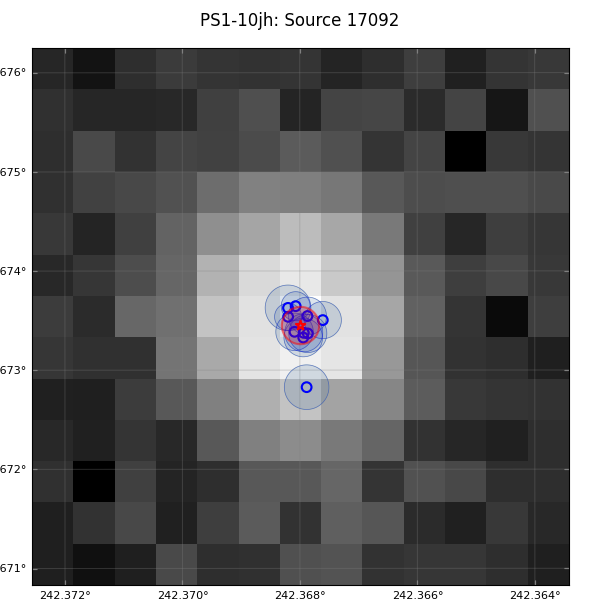

In [9]:
%%time
coord_cat = SkyCoord(tde_info["PS1-10jh"]["ra"] * u.deg, tde_info["PS1-10jh"]["dec"] * u.deg, frame="icrs")
vvis.plot_source_tumbnail(coord_cat, rg, cutout_size=(20, 20), fig_title="PS1-10jh", marker_shows="field", color_shows="source")

# Showcase plot styling utilites

## Markers

In [10]:
# Get list of markers
marker_set(10)

['o', 's', 'd', '*', 'v', 'X', '^', 'h', '<', 'P']

In [11]:
# Exclude some markers in case they are reserved already
marker_set(10, exclude=["*", "X"])

['o', 's', 'd', 'v', '^', 'h', '<', 'P', '>', 'p']

In [12]:
# Get large number of markers, markers will cycle
n_markers = 200
markers = marker_set(n_markers, exclude=["*", "X"])

# n_markers != len(set(markers))
f"unique markers: {len(set(markers))}"

'unique markers: 12'

## Colors

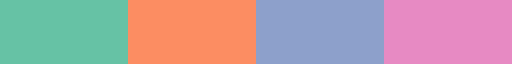

[(0.4, 0.7607843137254902, 0.6470588235294118, 1.0),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411, 1.0)]

In [13]:
# Get set of colors and display palette
# Returns list of RGBA color codes
color_palette("Set2", 4, show_in_notebook=True)

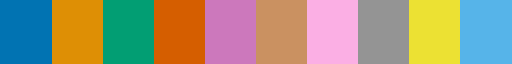

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745, 1.0),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549, 1.0),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275, 1.0),
 (0.8352941176470589, 0.3686274509803922, 0.0, 1.0),
 (0.8, 0.47058823529411764, 0.7372549019607844, 1.0),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451, 1.0),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236, 1.0),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451, 1.0),
 (0.9254901960784314, 0.8823529411764706, 0.2, 1.0),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784, 1.0)]

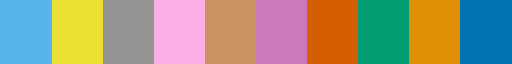

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784, 1.0),
 (0.9254901960784314, 0.8823529411764706, 0.2, 1.0),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451, 1.0),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236, 1.0),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451, 1.0),
 (0.8, 0.47058823529411764, 0.7372549019607844, 1.0),
 (0.8352941176470589, 0.3686274509803922, 0.0, 1.0),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275, 1.0),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549, 1.0),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745, 1.0)]

In [14]:
# Takes all named matplotlb colormaps additional to
# qualitative color palettes of seaborn
display(color_palette("colorblind", 10, show_in_notebook=True))

# Colormap reversal is supported
color_palette("colorblind_r", 10, show_in_notebook=True)

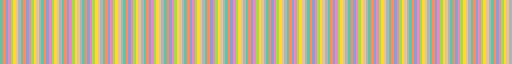

'unique colors: 8'

In [15]:
# Get large number of colors, colors will cycle
n_colors = 200
colors = color_palette("Set2", n_colors, show_in_notebook=True)

# n_markers != len(set(markers))
f"unique colors: {len(set(colors))}"

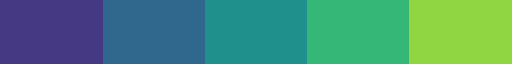

[(0.267968, 0.223549, 0.512008, 1.0),
 (0.190631, 0.407061, 0.556089, 1.0),
 (0.127568, 0.566949, 0.550556, 1.0),
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.565498, 0.84243, 0.262877, 1.0)]

In [16]:
# Continuous colormaps are sampled evenly-spaced
# Min/max values are excluded for better contrast
color_palette("viridis", 5, show_in_notebook=True)

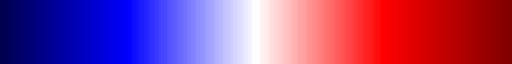

In [17]:
# Continuous colormaps do not cycle
_ = color_palette("seismic", 200, show_in_notebook=True)

In [18]:
# If input colormap name is unkown,
# error message tells which names are allowed
color_palette("viridis_R", 5, show_in_notebook=True)

ValueError: Unknown name 'viridis_R'. Choose one of ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bright', 'bright6', 'bright6_r', 'bright_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'colorblind', 'colorblind6', 'colorblind6_r', 'colorblind_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'dark', 'dark6', 'dark6_r', 'dark_r', 'deep', 'deep6', 'deep6_r', 'deep_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'muted', 'muted6', 'muted6_r', 'muted_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pastel', 'pastel6', 'pastel6_r', 'pastel_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']